### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 


## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 7


### Дисциплина: Интеллектуальный анализ данных



##### Студент:  Липатникова Марина
##### Группа:   НФИбд-02-19



## Москва 2022
***


#### Задание на лабораторную работу №7


Для закрепленного за Вами варианта лабораторной работы:

    1.	Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов и столбец с откликом (зависимой переменной).

    2.	Преобразуйте в числовые признаки неправильно распознанные признаки с числовыми значениями. Если в столбцах с метками классов и откликом имеются пропущенные значения, то удалите записи с пропущенными значениями. Оставьте в наборе данных только числовые признаки. 

    3.	Если в наборе данных остались пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если пропущенные значения в наборе данных отсутствуют, то определите и удалите точки с выбросами в соответствии с методом, указанным в индивидуальном задании. Выберите параметры методов таким образом, чтобы выбросы составляли не менее 5% всех точек набора данных. 

    4.	Масштабируйте признаки набора данных на интервал [0, 1]. Используя метод снижения размерности данных, указанный в индивидуальном задании, оставьте в наборе данных три признака (кроме метки класса и откликов), принимающих более 50 различных значений. 

    5.	Визуализируйте набор данных в виде точек в трехмерном пространстве, отображая точки разных классов разными цветами. В качестве подписей осей используйте названия признаков. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.

    6.	Разбейте набор данных на обучающую и тестовую выборки. Постройте регрессоры на базе моделей регрессии, указанных в индивидуальном задании, для каждого из трех признаков. Определите оптимальные параметры регрессоров при помощи GridSearchCV.

    7.	Для каждого из трех признаков визуализируйте на плоскости набор данных одним цветом и линии регрессии для регрессоров с оптимальными параметрами, определенными в п. 6 (всего три рисунка). Регрессоры, имеющие максимальное значение показателя качества регрессии, указанного в индивидуальном задании, выделите красным цветом. В качестве подписи оси X используйте название признака, в качестве подписи оси Y – название столбца с откликами. Создайте легенду для линий регрессии.

    8.	Постройте на одном рисунке кривые обучения (зависимость показателя качества регрессии, указанного в индивидуальном задании, от количества точек в обучающей выборке) для трех лучших регрессоров для каждого из трех признаков по показателю качества, указанному в индивидуальном задании. Кривые для регрессора с максимальным показателем качества визуализируйте красным цветом (кривую для обучающей выборки сплошной линией, кривую для тестовой выборки линией из точек). Подпишите корректно оси и создайте легенду для кривых обучения.




# Индивидуальное задание



Лабораторная работа 7 – Вариант 15 

Auto-Mpg Data Set 

Название файла: auto-mpg.data 

Ссылка: http://archive.ics.uci.edu/ml/datasets/Auto+MPG 

Класс: cylinders (столбец No 2) 

Зависимая переменная: horsepower (столбец No 4) 

Метод обработки пропущенных значений – среднее значение класса 

Метод обработки выбросов – алгоритм кластеризации OPTICS 

Метод снижения размерности данных – регрессия лассо (Lasso) 

Регрессоры: 

⁃            Полиномиальная регрессия (PolynomialFeatures+LinearRegression), параметр degree в диапазоне от 2 до 5 

⁃            регрессия лассо (Lasso), параметр alpha в диапазоне от 0.5 до 1.5 

⁃            регрессии на основе метода опорных векторов (SVR), параметр degree в диапазоне от 1 до 5 

Показатели качества регрессии: 

⁃            Для определения лучшего регрессора MedAE 

⁃            Для визуализации кривой обучения MaxErr 
 

1. Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов и столбец с откликом (зависимой переменной).

In [1]:

url = \
    "https://archive.ics.uci.edu/ml/"+\
    "machine-learning-databases/auto-mpg/auto-mpg.data"


In [2]:

import pandas as pd

data = pd.read_csv(url, sep='\s+', header=None)

data


,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [3]:

data.columns = ['mpg', 'cylinders', 'displacement',
            'horsepower', 'weight', 'acceleration', 
            'model year', 'origin', 'car name']
data


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


2.	Преобразуйте в числовые признаки неправильно распознанные признаки с числовыми значениями. Если в столбцах с метками классов и откликом имеются пропущенные значения, то удалите записи с пропущенными значениями. Оставьте в наборе данных только числовые признаки. 

In [4]:

import numpy as np


In [5]:

data = data.replace('?', np.NaN)



Пропущенные в откликах.


In [6]:

data.isnull().sum(axis=0)


mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [7]:

data.dtypes


mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [8]:

data = data.drop(['car name'], axis=1)


In [9]:

count = -1
a = []
for i in data['horsepower']:
    count += 1
    if i is np.nan:
        a.append(count)
        

In [10]:

data = data.drop(axis=0, index=a)
data


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1
394,44.0,4,97.0,52.00,2130.0,24.6,82,2
395,32.0,4,135.0,84.00,2295.0,11.6,82,1
396,28.0,4,120.0,79.00,2625.0,18.6,82,1


In [11]:

data.isnull().sum(axis=0)


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [12]:

data['horsepower'] = data['horsepower'].astype(float);


In [13]:

data.dtypes


mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
dtype: object

3.	Если в наборе данных остались пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если пропущенные значения в наборе данных отсутствуют, то определите и удалите точки с выбросами в соответствии с методом, указанным в индивидуальном задании. Выберите параметры методов таким образом, чтобы выбросы составляли не менее 5% всех точек набора данных.


Метод обработки выбросов – алгоритм кластеризации OPTICS 


Удаляем 20,9% точек.

In [14]:

from sklearn.cluster import OPTICS

model = OPTICS(eps=0.2, min_samples=2)
yhat = model.fit_predict(data)
print("Метки кластеров:", set(model.labels_))
print("Доля некластеризованных точек (выбросов):", list(model.labels_).count(-1) / len(list(model.labels_)))


Метки кластеров: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, -1}
Доля некластеризованных точек (выбросов): 0.20918367346938777


In [15]:

data3 = data.copy()


In [16]:

data3['m_cl'] = model.labels_
data3


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,m_cl
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,-1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,76
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,20
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,-1
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,38
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,28


In [17]:

df3 = (data3[data3['m_cl'] != -1]).copy()
df3 = df3.drop(['m_cl'], axis=1)
df3


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
5,15.0,8,429.0,198.0,4341.0,10.0,70,1
...,...,...,...,...,...,...,...,...
390,32.0,4,144.0,96.0,2665.0,13.9,82,3
391,36.0,4,135.0,84.0,2370.0,13.0,82,1
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
395,32.0,4,135.0,84.0,2295.0,11.6,82,1


4.	Масштабируйте признаки набора данных на интервал [0, 1]. Используя метод снижения размерности данных, указанный в индивидуальном задании, оставьте в наборе данных три признака (кроме метки класса и откликов), принимающих более 50 различных значений. 


Метод снижения размерности данных – регрессия лассо (Lasso)


In [18]:

data4 = df3.copy()
X = data4.drop(['cylinders', 'horsepower'],axis=1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) # значения признаков от 0 до 1
rescaledX = scaler.fit_transform(X)

print(rescaledX[0:5,:])


[[0.13661202 0.7265625  0.58973632 0.18404908 0.         0.        ]
 [0.21857923 0.64322917 0.51686986 0.15337423 0.         0.        ]
 [0.16393443 0.60677083 0.51601928 0.21472393 0.         0.        ]
 [0.19125683 0.6015625  0.52055571 0.12269939 0.         0.        ]
 [0.13661202 0.93229167 0.77346187 0.09202454 0.         0.        ]]


In [19]:

cyl = df3['cylinders'].values
hor = df3['horsepower'].values


In [20]:

df4 = pd.DataFrame(rescaledX)
df4.columns = ['mpg', 'displacement',
            'weight', 'acceleration', 
            'model year', 'origin']
df4['cylinders'] = cyl
df4['horsepower'] = hor
df4


,mpg,displacement,weight,acceleration,model year,origin,cylinders,horsepower
0,0.136612,0.726562,0.589736,0.184049,0.0,0.0,8,165.0
1,0.218579,0.643229,0.516870,0.153374,0.0,0.0,8,150.0
2,0.163934,0.606771,0.516019,0.214724,0.0,0.0,8,150.0
3,0.191257,0.601562,0.520556,0.122699,0.0,0.0,8,140.0
4,0.136612,0.932292,0.773462,0.092025,0.0,0.0,8,198.0
...,...,...,...,...,...,...,...,...
305,0.601093,0.190104,0.298270,0.331288,1.0,1.0,4,96.0
306,0.710383,0.166667,0.214630,0.276074,1.0,0.0,4,84.0
307,0.464481,0.179688,0.333711,0.435583,1.0,0.0,4,86.0
308,0.601093,0.166667,0.193365,0.190184,1.0,0.0,4,84.0


In [21]:

X = df4.drop(['cylinders', 'horsepower'],axis=1)


In [22]:

y = df4['horsepower']


В классной работе регрессия Лассо была в виде Pipeline, но для нее нет метода коэффициента, поэтому я взяла просто отдельно Lasso.

In [23]:

from sklearn.linear_model import Lasso
lasso_reg = Lasso(0.0001)
lasso_reg.fit(X, y)
print(lasso_reg.coef_)
lasso_reg1 = Lasso(0.001)
lasso_reg1.fit(X, y)
print(lasso_reg1.coef_)
lasso_reg2 = Lasso(0.1)
lasso_reg2.fit(X, y)
print(lasso_reg2.coef_)


[ -4.80722556  40.27632489  77.51420904 -75.07196741  -8.02497304
  10.3365216 ]
[ -4.75835214  40.35415109  77.45170591 -75.01719025  -8.02950414
  10.32046738]
[ -0.41624521  43.61889204  74.58477509 -70.61359686  -8.5124037
   8.29890241]


Ориентироваться будем на первых значениях.

In [24]:

X


,mpg,displacement,weight,acceleration,model year,origin
0,0.136612,0.726562,0.589736,0.184049,0.0,0.0
1,0.218579,0.643229,0.516870,0.153374,0.0,0.0
2,0.163934,0.606771,0.516019,0.214724,0.0,0.0
3,0.191257,0.601562,0.520556,0.122699,0.0,0.0
4,0.136612,0.932292,0.773462,0.092025,0.0,0.0
...,...,...,...,...,...,...
305,0.601093,0.190104,0.298270,0.331288,1.0,1.0
306,0.710383,0.166667,0.214630,0.276074,1.0,0.0
307,0.464481,0.179688,0.333711,0.435583,1.0,0.0
308,0.601093,0.166667,0.193365,0.190184,1.0,0.0


In [25]:

def def_count(name):
    c = name
    a = c.unique()
    count = 0
    for i in a:
        count+=1
    print(count)
    


Видим, что из положительных коэффициентов выделяются как раз три признака: displacement, weight, origin.

Однако в origin всего 3 различных значения. Ближайший хороший коэфф (но отрицательный...) mpg, значений больше 50.

Таким образом, наши признаки: displacement, weight, mpg.


In [26]:

def_count(X['displacement'])
def_count(X['weight'])
def_count(X['origin'])
#отрицательный, зато много значений
def_count(X['mpg'])


69
276
3
108


5.	Визуализируйте набор данных в виде точек в трехмерном пространстве, отображая точки разных классов разными цветами. В качестве подписей осей используйте названия признаков. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.

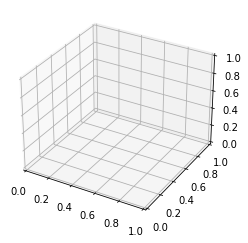

In [27]:


from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')



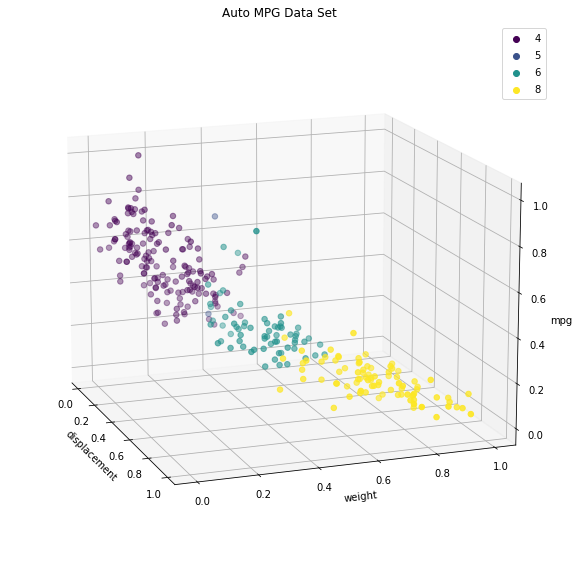

In [28]:

fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

xs = X.displacement
ys = X.weight
zs = X.mpg
scatter = ax.scatter( xs, ys, zs, c = df4['cylinders'], s=30 )
ax.set_xlabel('displacement')
ax.set_ylabel('weight')
ax.set_zlabel('mpg')
ax.view_init( azim=-20, elev=15 );
ax = plt.title("Auto MPG Data Set")
plt.legend(*scatter.legend_elements())


6.	Разбейте набор данных на обучающую и тестовую выборки. Постройте регрессоры на базе моделей регрессии, указанных в индивидуальном задании, для каждого из трех признаков. Определите оптимальные параметры регрессоров при помощи GridSearchCV.


Регрессоры: 

⁃            Полиномиальная регрессия (PolynomialFeatures+LinearRegression), параметр degree в диапазоне от 2 до 5 

⁃            регрессия лассо (Lasso), параметр alpha в диапазоне от 0.5 до 1.5 

⁃            регрессии на основе метода опорных векторов (SVR), параметр degree в диапазоне от 1 до 5 


In [29]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, df4['horsepower'], test_size=0.3, random_state=666)


In [30]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = Pipeline([
    ("poly", PolynomialFeatures()),
    ("lin_reg", LinearRegression())
])


In [31]:

X_train_displacement = X_train['displacement'].values.reshape(len(X_train['displacement']),1)
#X_test_displacement = X_test['displacement'].values.reshape(len(X_test['displacement']),1)
X_train_weight = X_train['weight'].values.reshape(len(X_train['weight']),1)
#X_test_weight = X_test['weight'].values.reshape(len(X_test['weight']),1)
X_train_mpg = X_train['mpg'].values.reshape(len(X_train['mpg']),1)
#X_test_mpg = X_test['mpg'].values.reshape(len(X_test['mpg']),1)


In [32]:

from sklearn.model_selection import GridSearchCV

param_grid = [{
        "poly__degree": [i for i in range(2, 6)]
    }]

grid_search_displacement = GridSearchCV(poly_reg, param_grid, n_jobs=-1, verbose=1)
grid_search_displacement.fit(X_train_displacement, y_train)

grid_search_weight = GridSearchCV(poly_reg, param_grid, n_jobs=-1, verbose=1)
grid_search_weight.fit(X_train_weight, y_train)

grid_search_mpg = GridSearchCV(poly_reg, param_grid, n_jobs=-1, verbose=1)
grid_search_mpg.fit(X_train_mpg, y_train)

print("Параметры для полиномиальной регрессии, признак displacement: ", grid_search_displacement.best_params_,'')
print("Параметры для полиномиальной регрессии, признак weight: ", grid_search_weight.best_params_,'')
print("Параметры для полиномиальной регрессии, признак mpg: ", grid_search_mpg.best_params_,'')


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Параметры для полиномиальной регрессии, признак displacement:  {'poly__degree': 5} 
Параметры для полиномиальной регрессии, признак weight:  {'poly__degree': 5} 
Параметры для полиномиальной регрессии, признак mpg:  {'poly__degree': 4} 


In [33]:

lasso = Lasso()
param_grid2 = [{
        "alpha": [i for i in np.arange(0.5, 1.6, 0.1)]
    }]
grid_search_displacement2 = GridSearchCV(lasso, param_grid2, n_jobs=-1, verbose=1)
grid_search_displacement2.fit(X_train_displacement, y_train)

grid_search_weight2 = GridSearchCV(lasso, param_grid2, n_jobs=-1, verbose=1)
grid_search_weight2.fit(X_train_weight, y_train)

grid_search_mpg2 = GridSearchCV(lasso, param_grid2, n_jobs=-1, verbose=1)
grid_search_mpg2.fit(X_train_mpg, y_train)

print("Параметры для регрессии лассо, признак displacement: ", grid_search_displacement2.best_params_,'')
print("Параметры для регрессии лассо, признак weight: ", grid_search_weight2.best_params_,'')
print("Параметры для регрессии лассо, признак mpg: ", grid_search_mpg2.best_params_,'')


Fitting 5 folds for each of 11 candidates, totalling 55 fits
Fitting 5 folds for each of 11 candidates, totalling 55 fits
Fitting 5 folds for each of 11 candidates, totalling 55 fits
Параметры для регрессии лассо, признак displacement:  {'alpha': 0.5} 
Параметры для регрессии лассо, признак weight:  {'alpha': 0.5} 
Параметры для регрессии лассо, признак mpg:  {'alpha': 0.5} 


In [34]:

from sklearn.svm import SVR
svr = SVR()
param_grid3 = [{
        "degree": [i for i in range(1, 6)]
    }]
grid_search_displacement3 = GridSearchCV(svr, param_grid3, n_jobs=-1, verbose=1)
grid_search_displacement3.fit(X_train_displacement, y_train)

grid_search_weight3 = GridSearchCV(svr, param_grid3, n_jobs=-1, verbose=1)
grid_search_weight3.fit(X_train_weight, y_train)

grid_search_mpg3 = GridSearchCV(svr, param_grid3, n_jobs=-1, verbose=1)
grid_search_mpg3.fit(X_train_mpg, y_train)

print("Параметры для регрессии на основе метода опорных векторов, признак displacement: ", grid_search_displacement3.best_params_,'')
print("Параметры для регрессии на основе метода опорных векторов, признак weight: ", grid_search_weight3.best_params_,'')
print("Параметры для регрессии на основе метода опорных векторов, признак mpg: ", grid_search_mpg3.best_params_,'')


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Параметры для регрессии на основе метода опорных векторов, признак displacement:  {'degree': 1} 
Параметры для регрессии на основе метода опорных векторов, признак weight:  {'degree': 1} 
Параметры для регрессии на основе метода опорных векторов, признак mpg:  {'degree': 1} 


7.    Для каждого из трех признаков визуализируйте на плоскости набор данных одним цветом и линии регрессии для регрессоров с оптимальными параметрами, определенными в п. 6 (всего три рисунка). Регрессоры, имеющие максимальное значение показателя качества регрессии, указанного в индивидуальном задании, выделите красным цветом. В качестве подписи оси X используйте название признака, в качестве подписи оси Y – название столбца с откликами. Создайте легенду для линий регрессии.


Показатели качества регрессии: 

-            Для определения лучшего регрессора MedAE


In [35]:

poly_reg_displacement = Pipeline([
    ("poly", PolynomialFeatures(degree=5)),
    ("lin_reg", LinearRegression())
])
poly_reg_weight = Pipeline([
    ("poly", PolynomialFeatures(degree=5)),
    ("lin_reg", LinearRegression())
])
poly_reg_mpg = Pipeline([
    ("poly", PolynomialFeatures(degree=4)),
    ("lin_reg", LinearRegression())
])

poly_reg_displacement.fit(X_train_displacement, y_train)
poly_reg_weight.fit(X_train_weight, y_train)
poly_reg_mpg.fit(X_train_mpg, y_train);


In [36]:

lasso_displacement = Lasso(alpha=0.5)
lasso_weight = Lasso(alpha=0.5)
lasso_mpg = Lasso(alpha=0.5)

lasso_displacement.fit(X_train_displacement, y_train)
lasso_weight.fit(X_train_weight, y_train)
lasso_mpg.fit(X_train_mpg, y_train);


In [37]:

svr_displacement = SVR(degree=1)
svr_weight = SVR(degree=1)
svr_mpg = SVR(degree=1)

svr_displacement.fit(X_train_displacement, y_train)
svr_weight.fit(X_train_weight, y_train)
svr_mpg.fit(X_train_mpg, y_train);



Т.к. мы делали масшатибрование от 0 до 1, то значения для х очевидны.
Для Median absolute error: The best value is 0.0. Т.е. выбираем наименьшее значение.


In [38]:

from sklearn.metrics import median_absolute_error

def plot_model(model1, model2, model3, x, y, x_label, name):
    plt.figure(figsize=(10,10))
    X_plot = np.linspace(0, 1, len(y)).reshape(len(y), 1)
    y_plot1 = model1.predict(X_plot)
    y_plot2 = model2.predict(X_plot)
    y_plot3 = model3.predict(X_plot)
    
    MedAE1 = median_absolute_error(y, y_plot1)
    MedAE2 = median_absolute_error(y, y_plot2)
    MedAE3 = median_absolute_error(y, y_plot3)
    print("MedAE ", model1, ":", MedAE1)
    print("MedAE ", model2, ":", MedAE2)
    print("MedAE ", model3, ":", MedAE3)
    labels = ['Полиномиальная регрессия', 'Регрессия лассо', 'Регрессия на основе метода опорных векторов']
    if MedAE1 <= MedAE2:
        if MedAE1<=MedAE3:
            plt.plot(X_plot[:,0], y_plot1, color='r', label = labels[0])
            plt.plot(X_plot[:,0], y_plot2, color='g', label = labels[1])
            plt.plot(X_plot[:,0], y_plot3, color='b', label = labels[2])
        else:
            plt.plot(X_plot[:,0], y_plot3, color='r', label = labels[2])
            plt.plot(X_plot[:,0], y_plot1, color='g', label = labels[0])
            plt.plot(X_plot[:,0], y_plot2, color='b', label = labels[1])
    else:
        if MedAE2<=MedAE3:
            plt.plot(X_plot[:,0], y_plot2, color='r', label = labels[1])
            plt.plot(X_plot[:,0], y_plot1, color='g', label = labels[0])
            plt.plot(X_plot[:,0], y_plot3, color='b', label = labels[2])
        else:
            plt.plot(X_plot[:,0], y_plot3, color='r', label = labels[2])
            plt.plot(X_plot[:,0], y_plot1, color='g', label = labels[0])
            plt.plot(X_plot[:,0], y_plot2, color='b', label = labels[1])
    
    plt.scatter(x, y)
    plt.axis([0, 1, y.min(), y.max()])
    plt.legend()
    plt.title(name)
    plt.xlabel(x_label)
    plt.ylabel('horsepower')
    plt.show()



MedAE  Pipeline(steps=[('poly', PolynomialFeatures(degree=5)),
                ('lin_reg', LinearRegression())]) : 53.28822463510622
MedAE  Lasso(alpha=0.5) : 51.91941039999095
MedAE  SVR(degree=1) : 42.714059155562296


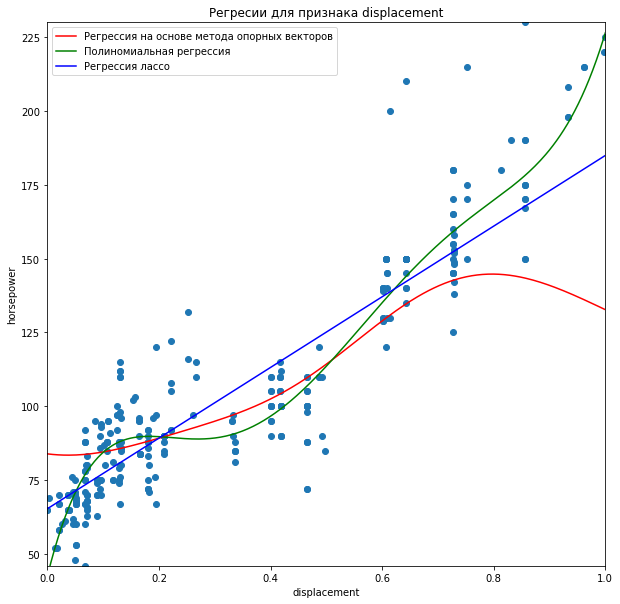

In [39]:

plot_model(poly_reg_displacement, lasso_displacement, svr_displacement, X['displacement'], y,
           'displacement', 'Регресии для признака displacement')


MedAE  Pipeline(steps=[('poly', PolynomialFeatures(degree=5)),
                ('lin_reg', LinearRegression())]) : 47.40961573062473
MedAE  Lasso(alpha=0.5) : 48.49602579428838
MedAE  SVR(degree=1) : 38.961722615832464


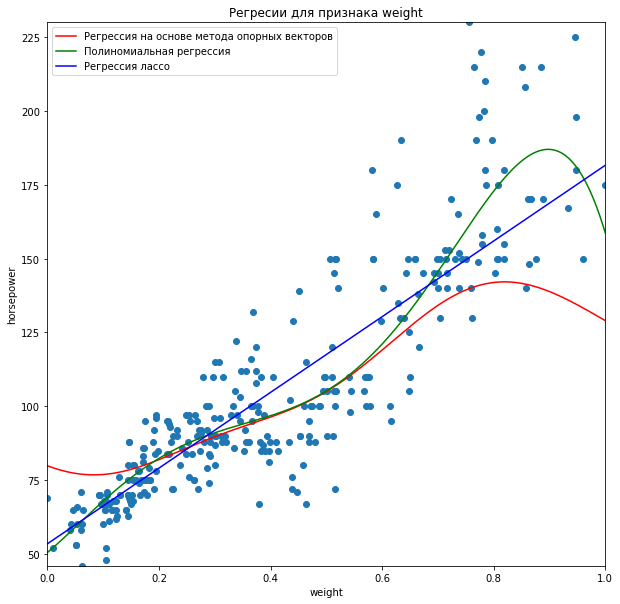

In [40]:

plot_model(poly_reg_weight, lasso_weight, svr_weight, X['weight'], y,
           'weight', 'Регресии для признака weight')


MedAE  Pipeline(steps=[('poly', PolynomialFeatures(degree=4)),
                ('lin_reg', LinearRegression())]) : 26.36345405271517
MedAE  Lasso(alpha=0.5) : 35.415729380313714
MedAE  SVR(degree=1) : 22.229756851383286


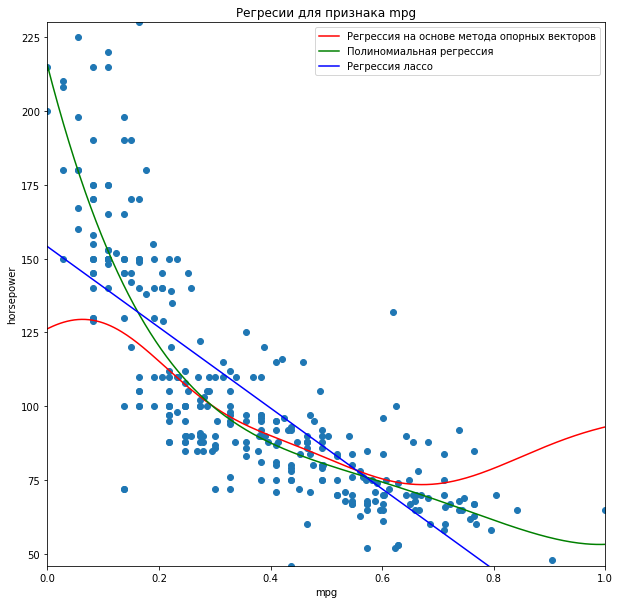

In [41]:

plot_model(poly_reg_mpg, lasso_mpg, svr_mpg, X['mpg'], y,
           'mpg', 'Регресии для признака mpg')


8.	Постройте на одном рисунке кривые обучения (зависимость показателя качества регрессии, указанного в индивидуальном задании, от количества точек в обучающей выборке) для трех лучших регрессоров для каждого из трех признаков по показателю качества, указанному в индивидуальном задании. Кривые для регрессора с максимальным показателем качества визуализируйте красным цветом (кривую для обучающей выборки сплошной линией, кривую для тестовой выборки линией из точек). Подпишите корректно оси и создайте легенду для кривых обучения.


Показатели качества регрессии: 

-            Для визуализации кривой обучения MaxErr



Для max_error: The best value is 0.0. Т.е. выбираем наименьшее значение.


In [42]:

X_displacement = X['displacement'].values.reshape(len(X['displacement']),1)
X_weight = X['weight'].values.reshape(len(X['weight']),1)
X_mpg = X['mpg'].values.reshape(len(X['mpg']),1)


In [43]:

pr_d1 = poly_reg_displacement.predict(X_displacement)
pr_w1 = poly_reg_weight.predict(X_weight)
pr_m1 = poly_reg_mpg.predict(X_mpg)

pr_d2 = lasso_displacement.predict(X_displacement)
pr_w2 = lasso_weight.predict(X_weight)
pr_m2 = lasso_mpg.predict(X_mpg)

pr_d3 = svr_displacement.predict(X_displacement)
pr_w3 = svr_weight.predict(X_weight)
pr_m3 = svr_mpg.predict(X_mpg)


In [44]:

from sklearn.metrics import max_error

me_d1 = max_error(y, pr_d1)
me_d2 = max_error(y, pr_d2)
me_d3 = max_error(y, pr_d3)

me_w1 = max_error(y, pr_w1)
me_w2 = max_error(y, pr_w2)
me_w3 = max_error(y, pr_w3)

me_m1 = max_error(y, pr_m1)
me_m2 = max_error(y, pr_m2)
me_m3 = max_error(y, pr_m3)

labels1 = ['Полиномиальная регрессия', 'Регрессия лассо', 'Регрессия на основе метода опорных векторов']
labels2 = ['displacement', 'weight', 'mpg']

print()
print(labels1[0], ' для признака ', labels2[0], ' по показателю качества max_error = ', me_d1,'\n')
print(labels1[1], ' для признака ', labels2[0], ' по показателю качества max_error = ', me_d2,'\n')
print(labels1[2], ' для признака ', labels2[0], ' по показателю качества max_error = ', me_d3,'\n\n')

print(labels1[0], ' для признака ', labels2[1], ' по показателю качества max_error = ', me_w1,'\n')
print(labels1[1], ' для признака ', labels2[1], ' по показателю качества max_error = ', me_w2,'\n')
print(labels1[2], ' для признака ', labels2[1], ' по показателю качества max_error = ', me_w3,'\n\n')

print(labels1[0], ' для признака ', labels2[2], ' по показателю качества max_error = ', me_m1,'\n')
print(labels1[1], ' для признака ', labels2[2], ' по показателю качества max_error = ', me_m2,'\n')
print(labels1[2], ' для признака ', labels2[2], ' по показателю качества max_error = ', me_m3)



Полиномиальная регрессия  для признака  displacement  по показателю качества max_error =  65.95901886785225 

Регрессия лассо  для признака  displacement  по показателю качества max_error =  67.77154913562129 

Регрессия на основе метода опорных векторов  для признака  displacement  по показателю качества max_error =  92.29991673865595 


Полиномиальная регрессия  для признака  weight  по показателю качества max_error =  68.87436787286254 

Регрессия лассо  для признака  weight  по показателю качества max_error =  79.73622491225862 

Регрессия на основе метода опорных векторов  для признака  weight  по показателю качества max_error =  90.3171568948651 


Полиномиальная регрессия  для признака  mpg  по показателю качества max_error =  98.6734877623071 

Регрессия лассо  для признака  mpg  по показателю качества max_error =  98.33910929982395 

Регрессия на основе метода опорных векторов  для признака  mpg  по показателю качества max_error =  108.90873152415801



Получаем, что: 
- для признака displacement лучшим регрессором будет Полиномиальная регрессия max_error =  65.95901886785225
- для признака weight лучшим регрессором будет Полиномиальная регрессия max_error =  68.87436787286254 
- для признака mpg лучшим регрессором будет Регрессия лассо max_error =  98.33910929982395 

Самым лучший показатель качества у признака displacement.


In [45]:

def plot_learning_curves(model_reg, X_train, X_test, y_train, y_test, atr_name):
    colours = ['g', 'b']
    plt.figure(figsize=(12,8))
    
    for j in range(0, len(model_reg)):
        
        train_score = []
        test_score = []
        X_train_pl = (X_train[atr_name[j]].values).reshape(len(y_train),1)
        X_test_pl = (X_test[atr_name[j]].values).reshape(len(y_test),1)

        for i in range(1, len(X_train_pl)+1):
            
            model_reg[j].fit(X_train_pl[:i], y_train[:i])
            y_train_predict = model_reg[j].predict(X_train_pl[:i])
            train_score.append(max_error(y_train[:i], y_train_predict))
            y_test_predict = model_reg[j].predict(X_test_pl)
            test_score.append(max_error(y_test, y_test_predict))

        if atr_name[j]=='displacement':
            plt.plot([i for i in range(1, len(X_train_pl)+1)],
                train_score, label="train " + atr_name[j], c = 'r')
            plt.plot([i for i in range(1, len(X_train_pl)+1)],
                test_score, label="test " + atr_name[j], linestyle='dashed', c = 'r')
        else:
            plt.plot([i for i in range(1, len(X_train_pl)+1)], 
                train_score, label="train " + atr_name[j], c = colours[j-1])
            plt.plot([i for i in range(1, len(X_train_pl)+1)],
                test_score, label="test " + atr_name[j], linestyle='dashed', c = colours[j-1])
            
    plt.xlabel('Количество точек в обучающей выборке')
    plt.ylabel('Значение показателя качества регрессии по показателю max_error')
    plt.title('Кривые обучения для трех лучших регрессоров')
    plt.legend()
    plt.axis([0, len(X_train)+1, 0, 300])
    plt.show()
    

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


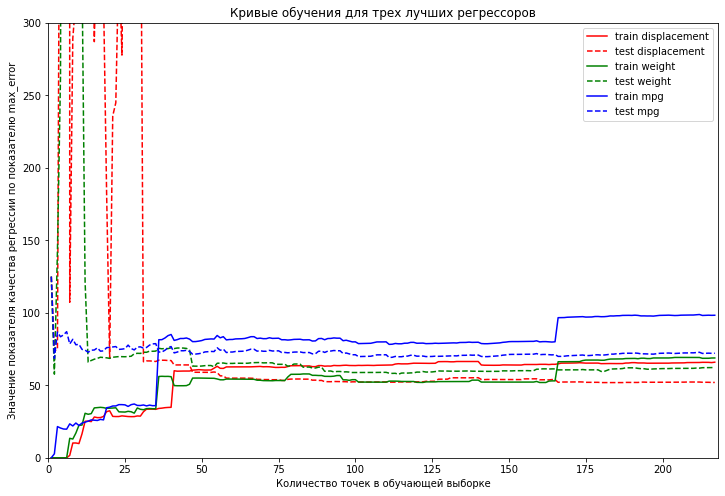

In [46]:

models = [poly_reg_displacement, poly_reg_weight, lasso_mpg]
atr = ['displacement', 'weight', 'mpg']
plot_learning_curves(models, X_train, X_test, y_train, y_test, atr)
